In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import math
# acquire
from env import host, user, password
from pydataset import data

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import learning_curve

#Docs
import acquire
import prepare
import explore


# Acquire

In [2]:
#acquire for zillow
zillow_df= acquire.get_zillow_data()

In [3]:
#Looking at first 5 values
zillow_df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,buildingclasstypeid,buildingclassdesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,None,None,NaN,None,None,None,NaN,None,NaN,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None


In [4]:
#52,953 rows and 78 columns
zillow_df.shape

(52953, 78)

In [5]:
# Displaying readable summary statistics for numeric columns.
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52953.0,1.497098e+06,8.594523e+05,3.490000e+02,7.575020e+05,1.500314e+06,2.241055e+06,2.982270e+06
parcelid,52953.0,1.302532e+07,3.352247e+06,1.071186e+07,1.151646e+07,1.259350e+07,1.414307e+07,1.676878e+08
airconditioningtypeid,13650.0,2.436777e+00,3.844722e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,52953.0,2.294752e+00,1.022623e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52953.0,3.290692e+00,9.573980e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33807.0,6.266335e+00,1.715852e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52748.0,2.302988e+00,1.015186e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,415.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [6]:
# Running .info() to see datatypes

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52953 entries, 0 to 52952
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52953 non-null  int64  
 1   parcelid                      52953 non-null  int64  
 2   airconditioningtypeid         13650 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   52953 non-null  float64
 6   bedroomcnt                    52953 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33807 non-null  float64
 9   calculatedbathnbr             52748 non-null  float64
 10  decktypeid                    415 non-null    float64
 11  finishedfloor1squarefeet      4724 non-null   float64
 12  calculatedfinishedsquarefeet  52822 non-null  float64
 13  f

In [7]:
#Looking at how many nulls in each column
zillow_df.isnull().sum()

id                                  0
parcelid                            0
airconditioningtypeid           39303
architecturalstyletypeid        52883
basementsqft                    52903
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52953
buildingqualitytypeid           19146
calculatedbathnbr                 205
decktypeid                      52538
finishedfloor1squarefeet        48229
calculatedfinishedsquarefeet      131
finishedsquarefeet12              339
finishedsquarefeet13            52911
finishedsquarefeet15            52953
finishedsquarefeet50            48229
finishedsquarefeet6             52787
fips                                0
fireplacecnt                    45541
fullbathcnt                       205
garagecarcnt                    34562
garagetotalsqft                 34562
hashottuborspa                  51438
heatingorsystemtypeid           19002
latitude                            0
longitude   

In [8]:
# looking at duplicates by unique values
zillow_df.duplicated().value_counts()

False    52953
dtype: int64

In [9]:
# Count duplicate on a parcelid column
zillow_df['parcelid'].duplicated().sum()

125

In [10]:
#seeing if there is duplicate parcelid
zillow_df['parcelid']

,parcelid,parcelid
0,14297519,14297519
1,17052889,17052889
2,14186244,14186244
3,12177905,12177905
4,12095076,12095076
...,...,...
52948,12412492,12412492
52949,11000655,11000655
52950,17239384,17239384
52951,12773139,12773139


In [11]:
# Drop duplicate columns
zillow_df= zillow_df.loc[:, ~zillow_df.columns.duplicated()]

In [12]:
#drop duplicated by unique identifier parcelid column
zillow_df.drop_duplicates(subset=['parcelid'], inplace= True)

In [13]:
#Looking at all columns
zillow_df.columns.tolist()

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [14]:
#verify there are not two parcelid columns
zillow_df['parcelid']

0        14297519
1        17052889
2        14186244
3        12177905
4        12095076
           ...   
52948    12412492
52949    11000655
52950    17239384
52951    12773139
52952    12826780
Name: parcelid, Length: 52828, dtype: int64

## Acquire Findings:
- Great amount of nulls need to filled or dropped
- need to drop duplicates by parcelid (this is a unique identifier)
- Most of the datatypes look good, no changes needed
- The columns with object datatype will not be used or will be dropped
- Features to consider binning: logerror, acres, squarefeet, dollar per square foot-structure, and dollar per square foot-land

# Prepare

In [15]:
#Using function from prepare file to see how percentage of nulls in each column
#Looking at this will help us choose a threshold for columns and rows to drop
prepare.miss_dup_values(zillow_df)

Your selected dataframe has 68 columns.
There are 52 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
buildingclasstypeid,52828,100.0
buildingclassdesc,52828,100.0
finishedsquarefeet15,52828,100.0
finishedsquarefeet13,52787,99.9
basementsqft,52778,99.9
storydesc,52778,99.9
storytypeid,52778,99.9
yardbuildingsqft26,52763,99.9
architecturalstyletypeid,52758,99.9
architecturalstyledesc,52758,99.9


In [16]:
#Create logerror bins to make pairplots
zillow_df['logerror_bins'] = pd.cut(zillow_df.logerror, [-5, -.2, -.05, .05, .2, 4])

In [17]:
# Using create feature function to create more features
zillow_df= prepare.create_features(zillow_df)

In [18]:
#Use function to handling nulls (drops any column and row with 90% or more nulls)
zillow_df= prepare.handle_missing_values(zillow_df, prop_required_column = .9, prop_required_row = .9)

In [20]:
#Looking at shape after dropping columns
zillow_df.shape

(52292, 41)

In [21]:
#Looking at how many nulls after initial drop
zillow_df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                64
calculatedfinishedsquarefeet      0
finishedsquarefeet12            196
fips                              0
fullbathcnt                      64
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
propertylandusetypeid             0
rawcensustractandblock            0
regionidcity                    981
regionidcounty                    0
regionidzip                       7
roomcnt                           0
yearbuilt                        27
structuretaxvaluedollarcnt       57
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         3
censustractandblock              54
logerror                          0
transactiondate             

In [22]:
# looking at percentage of null values after initial drop
prepare.miss_dup_values(zillow_df)

Your selected dataframe has 41 columns.
There are 18 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
regionidcity,981,1.9
finishedsquarefeet12,196,0.4
calculatedbathnbr,64,0.1
fullbathcnt,64,0.1
structure_dollar_sqft_bin,58,0.1
structure_dollar_per_sqft,57,0.1
structuretaxvaluedollarcnt,57,0.1
censustractandblock,54,0.1
bath_bed_ratio,33,0.1
age,27,0.1


In [23]:
#Drop any remaining nulls
zillow_df= zillow_df.dropna()

In [24]:
#Looking at number of rows and columns after dropping remaining nulls
zillow_df.shape

(50939, 41)

In [25]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50939 entries, 0 to 52952
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            50939 non-null  int64   
 1   parcelid                      50939 non-null  int64   
 2   bathroomcnt                   50939 non-null  float64 
 3   bedroomcnt                    50939 non-null  float64 
 4   calculatedbathnbr             50939 non-null  float64 
 5   calculatedfinishedsquarefeet  50939 non-null  float64 
 6   finishedsquarefeet12          50939 non-null  float64 
 7   fips                          50939 non-null  float64 
 8   fullbathcnt                   50939 non-null  float64 
 9   latitude                      50939 non-null  float64 
 10  longitude                     50939 non-null  float64 
 11  lotsizesquarefeet             50939 non-null  float64 
 12  propertycountylandusecode     50939 non-null  

In [26]:
#Create logerror bins to make pairplots
# zillow_df['logerror_bins'] = pd.cut(zillow_df.logerror, [-5, -.2, -.05, .05, .2, 4])

In [27]:
# Using create feature function
# zillow_df= prepare.create_features(zillow_df)

## Prepare Findings:
- Initial drop of nulls (compared to initial shape): dropped 661 rows and 37 columns
- Last drop of nulls (compared to initial shape): dropped 2,014 rows and 37 columns
- A great deal of nulls in columns and rows that need to be removed and/or filled in
- outliers are present and need to be removed
- duplicated parcelid was dropped
- created bin for logerror to be able to view better visually and compare to other features



# Explore

In [28]:
#split by using function from prepare.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_zillow(zillow_df, 'logerror')

In [29]:
#Looking at what columns are in X_train
X_train.columns.tolist()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'transactiondate',
 'propertylandusedesc',
 'logerror_bins',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio']

In [30]:
#Looking at first 5 values to see train printed
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio
42410,1075847,10981522,1.0,2.0,1.0,1392.0,1392.0,6037.0,1.0,34278137.0,...,0.466,1.353442,0.364210,0.3,0.3,46.959052,0.1,0.937977,0.0,0.500000
46930,1092540,11492862,3.0,4.0,3.0,3348.0,3348.0,6037.0,3.0,33863545.0,...,0.200,1.241068,0.125115,0.1,0.7,78.411290,0.3,80.152844,0.4,0.750000
24377,1801753,14146692,2.0,4.0,2.0,2167.0,2167.0,6059.0,2.0,33901711.0,...,0.400,1.371373,0.175964,0.2,0.5,30.650208,0.1,3.583170,0.1,0.500000
14417,354183,14055075,1.5,3.0,1.5,1122.0,1122.0,6059.0,1.0,33675242.0,...,0.400,1.216511,0.020202,0.0,0.2,50.926916,0.2,152.382955,0.5,0.500000
16483,2440638,13023811,1.0,3.0,1.0,964.0,964.0,6037.0,1.0,34112642.0,...,0.466,1.288426,0.136387,0.1,0.1,116.008299,0.4,25.824777,0.3,0.333333


In [31]:
#Looking at list of columns in train
train.columns.tolist()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc',
 'logerror_bins',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio']

In [32]:
#Looking at correlation by logerror
train.corr()[['logerror']].sort_values(by='logerror')

,logerror
structure_dollar_sqft_bin,-0.039203
structure_dollar_per_sqft,-0.037194
lot_dollar_sqft_bin,-0.028546
regionidcounty,-0.021040
age_bin,-0.018490
land_dollar_per_sqft,-0.018378
age,-0.018066
latitude,-0.013469
landtaxvaluedollarcnt,-0.011415
taxamount,-0.011066


<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

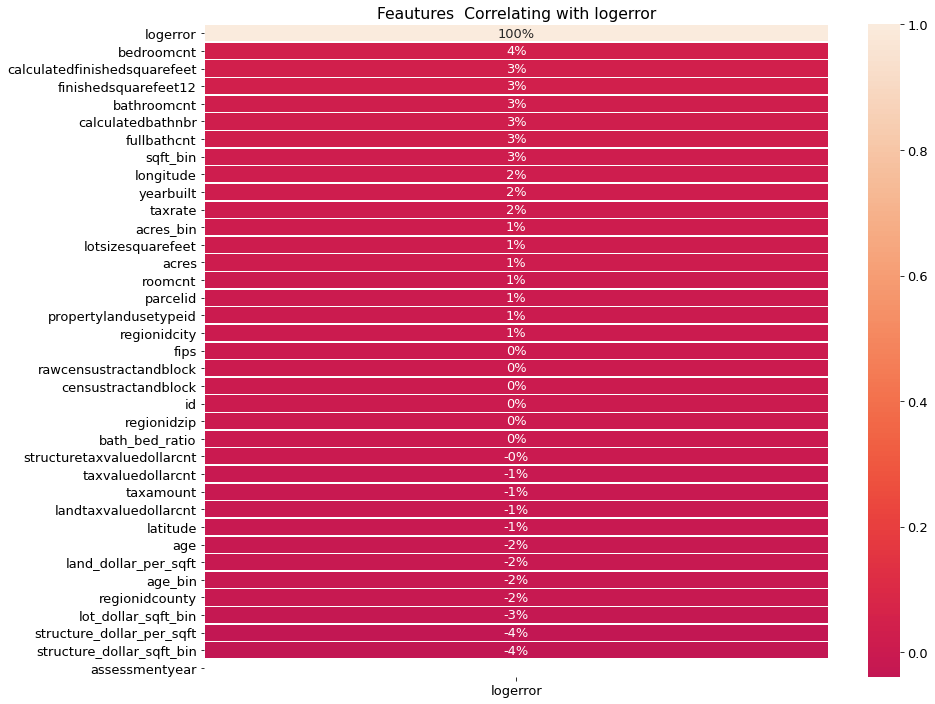

In [34]:
#correlation map of all features before clustering
prepare.get_heatmap(train, 'logerror', color= 'rocket')

In [35]:
# #Make train sample variable to run a pairplot below
# train_sample= train.sample(500)

In [36]:
# # pairplot
# sns.pairplot(train_sample[['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'calculatedbathnbr', 'bedroomcnt', 'logerror']], hue='logerror')

In [37]:
# Making column list for first set of features
col_list=train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

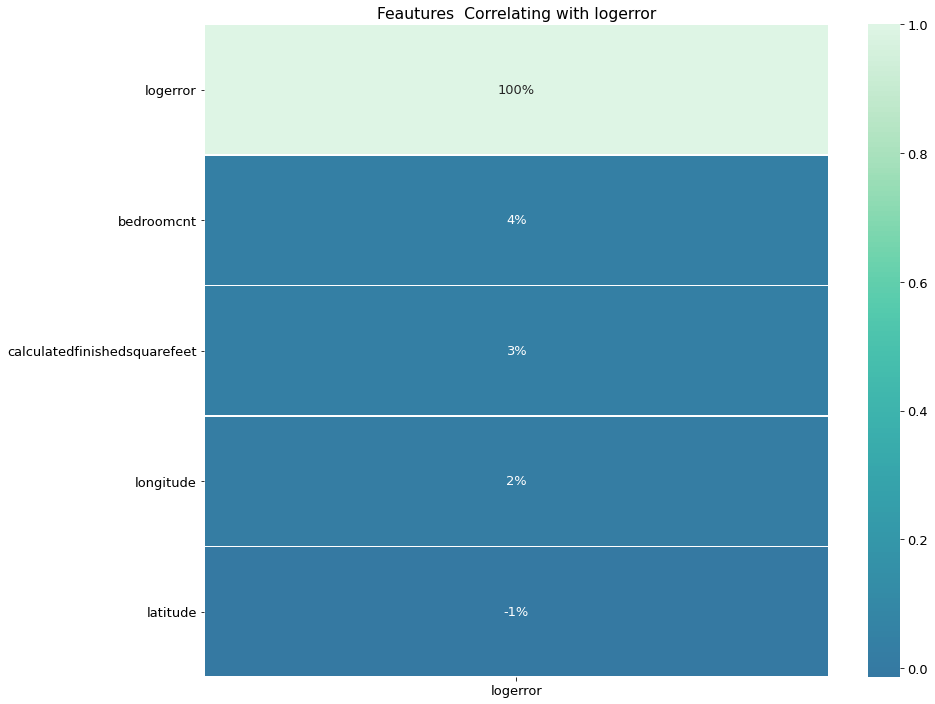

In [38]:
#Looking at correlation heatmap of first set of features
prepare.get_heatmap(col_list, 'logerror')

In [39]:
#making get_heatmap function
def get_heatmap(col_list, target,  color = 'mako'):
    '''
    This method will return a heatmap of all variables and there relation to logerror
    '''
    plt.figure(figsize=(14,12))
    heatmap = sns.heatmap(col_list.corr()[[target]].sort_values(by=target, ascending=False), annot=True, linewidth=0.5,fmt = '.0%',cmap = color, center = 0)
    heatmap.set_title('Feautures  Correlating with {}'.format(target))
    
    return heatmap


In [42]:
#Column list for second set of features
col_list2=train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'fullbathcnt', 'fips']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

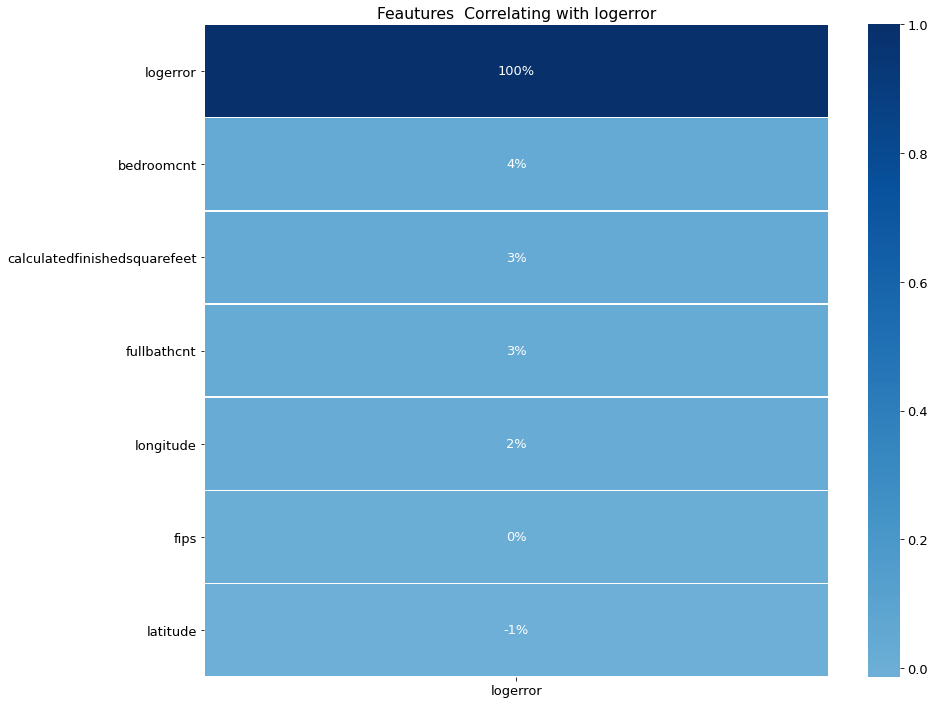

In [43]:
#Looking at correlation heatmap of second set of features
get_heatmap(col_list2, 'logerror', color= 'Blues')

In [45]:
#Making a column list for third set of features
col_list3= train[['logerror', 'latitude', 'longitude', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'fips']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

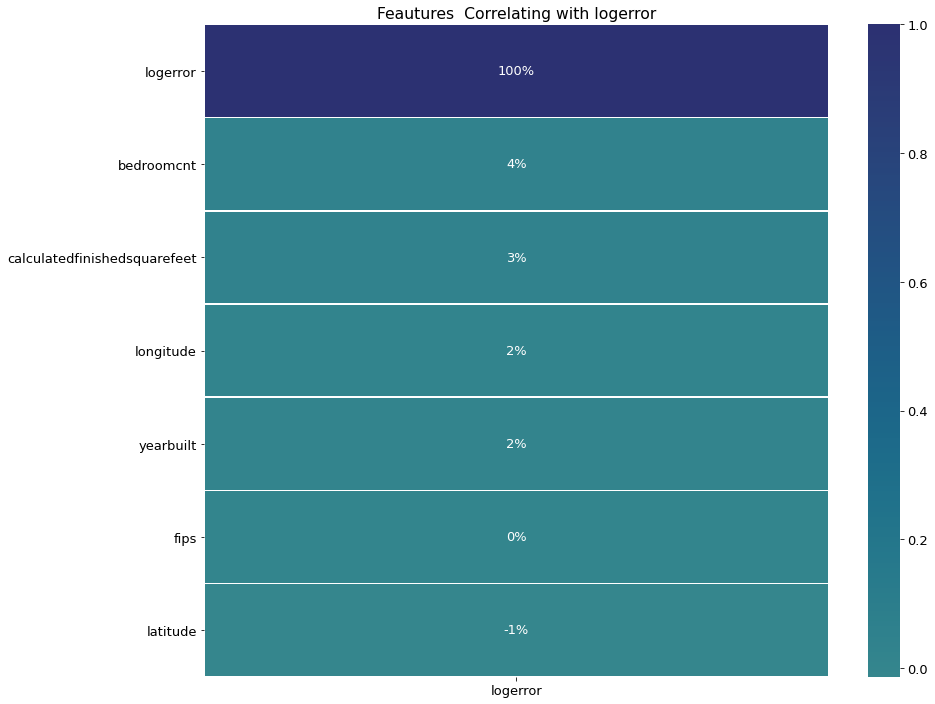

In [46]:
#Looking at correlation heatmap of third set of features
get_heatmap(col_list3, 'logerror', color= 'crest')

## Statistics

In [47]:
# Is there a relationship between calculatedfinishedsquarefeet and logerror?
# continuous vs continuous
# Pearson correlation r

<function matplotlib.pyplot.show(close=None, block=None)>

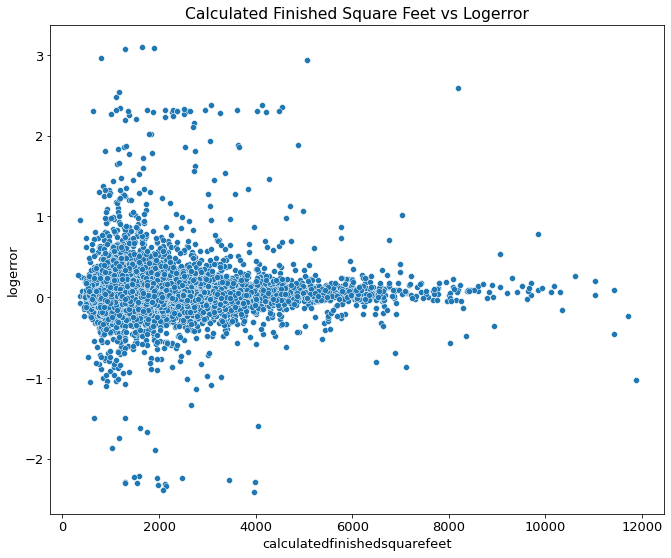

In [48]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y = 'logerror', data= train)
plt.title('Calculated Finished Square Feet vs Logerror')
plt.show

In [49]:
corr, p= stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
print(corr,p)

0.0341671582032706 7.831670673319782e-09


In [50]:
alpha= 0.05

null = 'There is no relationship between calculatedfinishedsquarefeet and logerror'

if p < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')


 we reject the null hypothesis,  There is no relationship between calculatedfinishedsquarefeet and logerror


In [51]:
# bedroomcnt vs logerror
# categorical vs continuous
# t-test

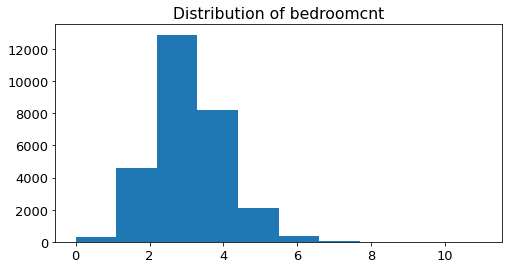

In [52]:
#looking at distribution for bedroom count
plt.figure(figsize=(8,4))
plt.hist(train['bedroomcnt'])
plt.title(f'Distribution of bedroomcnt')
plt.show()

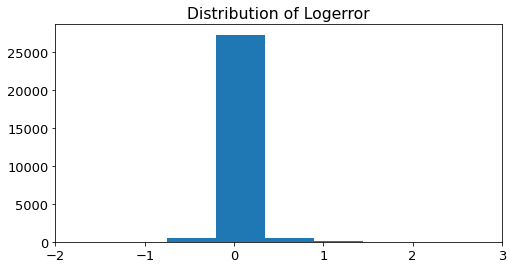

In [53]:
#Looking at distribution for logerror
plt.figure(figsize=(8,4))
plt.hist(train['logerror'])
plt.title(f'Distribution of Logerror')
plt.xlim(-2, 3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

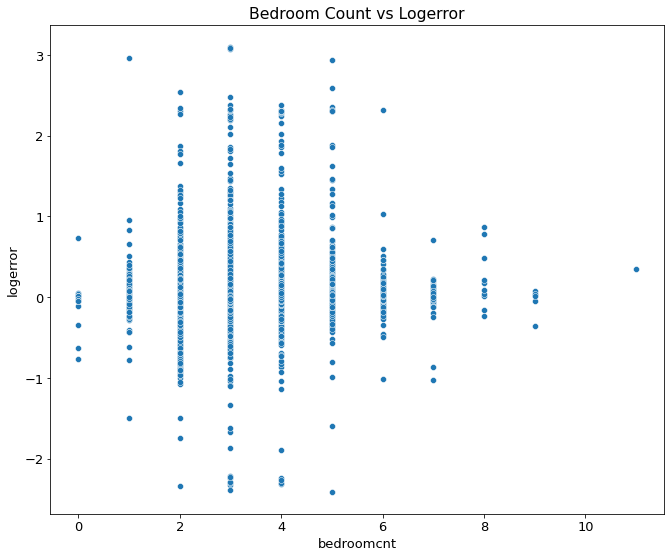

In [54]:
sns.scatterplot(x='bedroomcnt', y = 'logerror', data= train)
plt.title('Bedroom Count vs Logerror')
plt.show

In [55]:
#Looking at stats for bedroom count to do variance test
train['bedroomcnt'].describe().T

count    28525.000000
mean         3.297739
std          0.925766
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedroomcnt, dtype: float64

In [56]:
# test the assumption of equal variance
stats.levene(train[train.bedroomcnt <= 3].logerror, 
             train[train.bedroomcnt > 3].logerror
            )

LeveneResult(statistic=3.2026215522596138, pvalue=0.07353093863051137)

In [57]:
#Mannwhiteneyu test (a type of t-test when not normally distributed)

group1 = train[train.bedroomcnt <= 3]['logerror']
group2 = train[train.bedroomcnt > 3]['logerror']

t, p2= stats.mannwhitneyu(group1, group2)

t,p2

(88593341.0, 1.6302261762778682e-24)

In [58]:
alpha= 0.05

null = 'There is no difference in means between bedroom count and logerror'

if p2 < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  There is no difference in means between bedroom count and logerror


In [59]:
# latitude v logerror
# categorical vs continuous
# t-test

<function matplotlib.pyplot.show(close=None, block=None)>

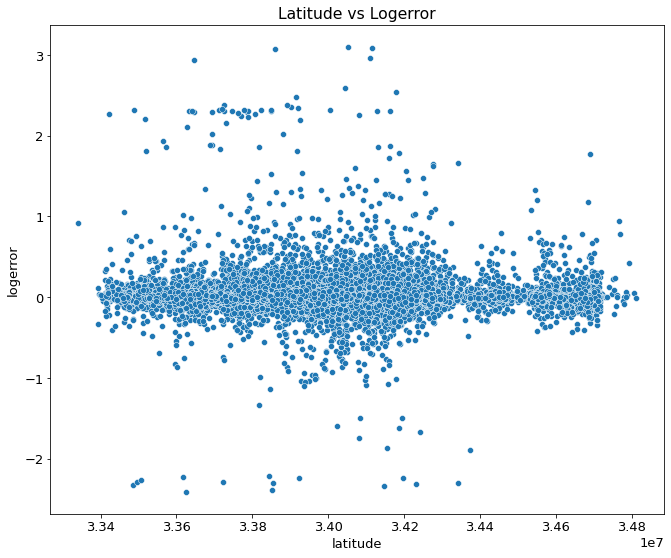

In [60]:
sns.scatterplot(x='latitude', y = 'logerror', data= train)
plt.title('Latitude vs Logerror')
plt.show

In [61]:
corr3, p3 = stats.pearsonr(train.logerror, train.latitude)
print(corr,p3)

0.0341671582032706 0.022916553351167587


In [62]:
alpha= 0.05

null = 'There is no relationship between latitude and logerror'

if p3 < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  There is no relationship between latitude and logerror


## Takeaways: Exploration before Clustering
- logerror has low correlation rates thus does not correlate well with any one feature
    - highest correlated features include:
        - 4%: Bedroom count
        - 3%: Finished square feet 12 (finished living area), calculated Finished Square Feet (calculated total finish living area of home), bathroom count, calculatedbathnbr (# of bathrooms in home including fractional bathroom), Full bath count, square feet bin
        - 2%: Longitude (West to East), yearbuilt, tax rate
- Due to lack of correlation with perform clustering to try and find more features

## Exploring: Clustering

In [63]:
# define independent variables for k-means

X = train[['latitude', 'calculatedfinishedsquarefeet']]
X.head()

,latitude,calculatedfinishedsquarefeet
42410,34278137.0,1392.0
46930,33863545.0,3348.0
24377,33901711.0,2167.0
14417,33675242.0,1122.0
16483,34112642.0,964.0


In [64]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

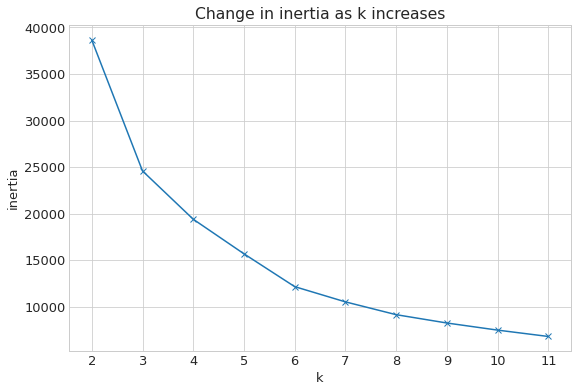

In [65]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

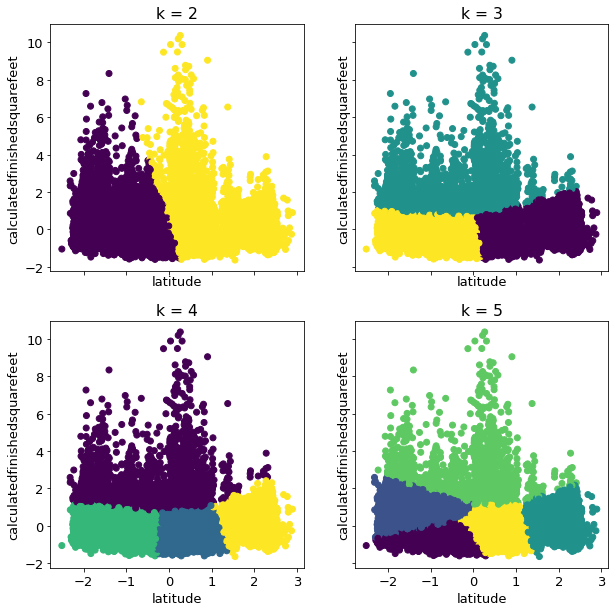

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.latitude, X_scaled.calculatedfinishedsquarefeet, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='calculatedfinishedsquarefeet')

In [67]:
def create_cluster(df, X, k, col_name = None):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    
    kmeans.fit(X_scaled)
    
    centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = list(X))
    
    if col_name == None:
        #clusters on dataframe 
        df[f'clusters_{k}'] = kmeans.predict(X_scaled)
    else:
        df[col_name] = kmeans.predict(X_scaled)
    
    
    return df, X_scaled, scaler, kmeans, centroids_scaled


In [68]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio
42410,1075847,10981522,1.0,2.0,1.0,1392.0,1392.0,6037.0,1.0,34278137.0,...,0.466,1.353442,0.364210,0.3,0.3,46.959052,0.1,0.937977,0.0,0.500000
46930,1092540,11492862,3.0,4.0,3.0,3348.0,3348.0,6037.0,3.0,33863545.0,...,0.200,1.241068,0.125115,0.1,0.7,78.411290,0.3,80.152844,0.4,0.750000
24377,1801753,14146692,2.0,4.0,2.0,2167.0,2167.0,6059.0,2.0,33901711.0,...,0.400,1.371373,0.175964,0.2,0.5,30.650208,0.1,3.583170,0.1,0.500000
14417,354183,14055075,1.5,3.0,1.5,1122.0,1122.0,6059.0,1.0,33675242.0,...,0.400,1.216511,0.020202,0.0,0.2,50.926916,0.2,152.382955,0.5,0.500000
16483,2440638,13023811,1.0,3.0,1.0,964.0,964.0,6037.0,1.0,34112642.0,...,0.466,1.288426,0.136387,0.1,0.1,116.008299,0.4,25.824777,0.3,0.333333


In [69]:
# use the functions created above: 3 clusters

df, X_scaled, scaler, kmeans, centroids_scaled = create_cluster(train, X, 3, col_name= 'cluster_latitude_calculatedsqft')

In [70]:
def create_scatter_plot_lat_csqft(x,y,df,kmeans, X_scaled, scaler, col_name = None):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    
    plt.figure(figsize=(14, 9))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster_latitude_calculatedsqft')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

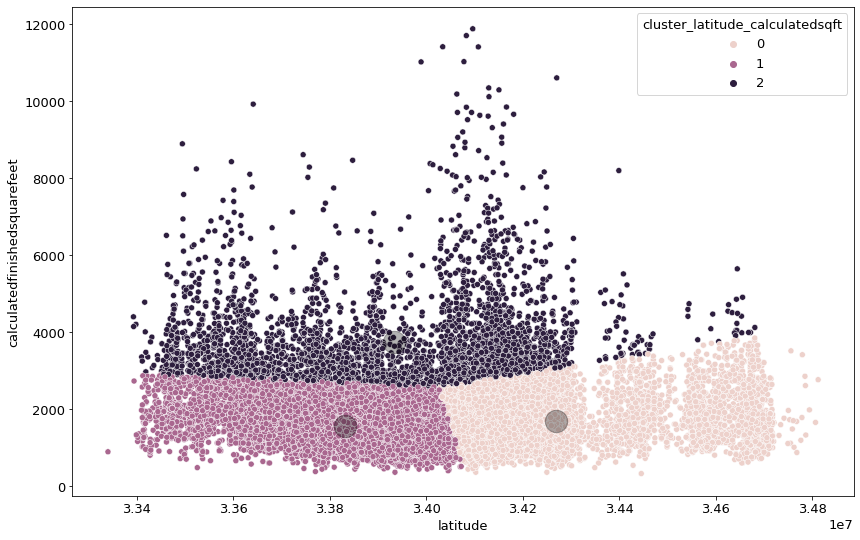

In [71]:
# use the functions created above to plot the data

create_scatter_plot_lat_csqft('latitude', 'calculatedfinishedsquarefeet', train, kmeans, X_scaled, scaler)

In [72]:
## Second clustering

In [73]:
# define independent variables for k-means

X2 = train[['latitude', 'longitude']]
X2.head()

,latitude,longitude
42410,34278137.0,-118372632.0
46930,33863545.0,-118362351.0
24377,33901711.0,-117910837.0
14417,33675242.0,-117954730.0
16483,34112642.0,-117894762.0


In [74]:
# Scale the X

scaler3 = StandardScaler().fit(X2)
X_scaled3 = pd.DataFrame(scaler3.transform(X2), columns= X2.columns).set_index([X2.index.values])

In [75]:
def four_scatter_plots(X_scaled, col_name= 'column_one', col_name_two= 'column_two'):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    for ax, k in zip(axs.ravel(), range(2, 6)):
        clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
        ax.scatter(X_scaled[col_name], X_scaled[col_name_two], c=clusters)
        ax.set(title='k = {}'.format(k), xlabel=col_name, ylabel=col_name_two)

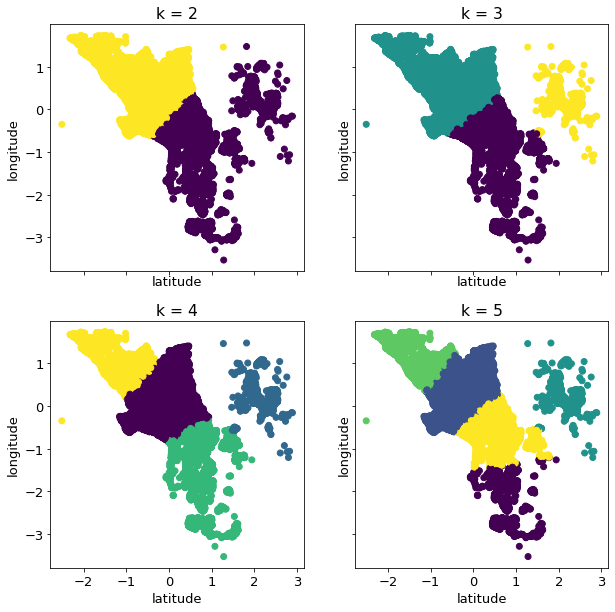

In [76]:
four_scatter_plots(X_scaled3, col_name= 'latitude', col_name_two='longitude')

In [77]:
# fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
# for ax, k in zip(axs.ravel(), range(2, 6)):
#     clusters = KMeans(k).fit(X_scaled3).predict(X_scaled3)
#     ax.scatter(X_scaled3.latitude, X_scaled3.longitude, c=clusters)
#     ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='longitude')

In [78]:
# use the functions created above: 3 clusters


df, X_scaled3, scaler3, kmeans3, centroids_scaled3 = create_cluster(train, X2, 3, 'cluster_latitude_longitude')

In [79]:
#seeing what is in df
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cluster_latitude_calculatedsqft,cluster_latitude_longitude
42410,1075847,10981522,1.0,2.0,1.0,1392.0,1392.0,6037.0,1.0,34278137.0,...,0.364210,0.3,0.3,46.959052,0.1,0.937977,0.0,0.500000,0,2
46930,1092540,11492862,3.0,4.0,3.0,3348.0,3348.0,6037.0,3.0,33863545.0,...,0.125115,0.1,0.7,78.411290,0.3,80.152844,0.4,0.750000,2,1
24377,1801753,14146692,2.0,4.0,2.0,2167.0,2167.0,6059.0,2.0,33901711.0,...,0.175964,0.2,0.5,30.650208,0.1,3.583170,0.1,0.500000,1,1
14417,354183,14055075,1.5,3.0,1.5,1122.0,1122.0,6059.0,1.0,33675242.0,...,0.020202,0.0,0.2,50.926916,0.2,152.382955,0.5,0.500000,1,1
16483,2440638,13023811,1.0,3.0,1.0,964.0,964.0,6037.0,1.0,34112642.0,...,0.136387,0.1,0.1,116.008299,0.4,25.824777,0.3,0.333333,0,1


In [80]:
def create_scatter_plot_lat_long(x, y, df, kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    
    plt.figure(figsize=(14, 9))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster_latitude_longitude')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

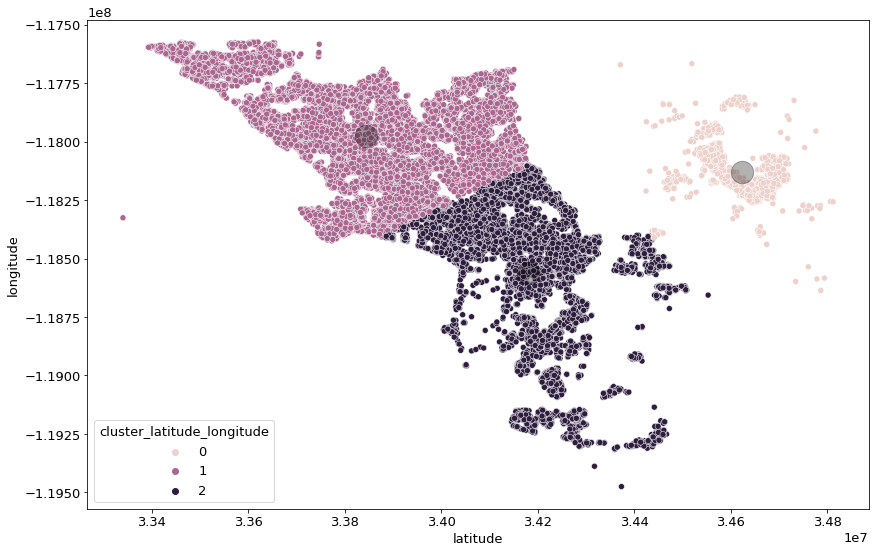

In [81]:
# use the functions created above to plot the data

create_scatter_plot_lat_long('latitude', 'longitude', train, kmeans3, X_scaled3, scaler3)

In [82]:
## third clustering

In [83]:
# define independent variables for k-means

X4 = train[['latitude', 'yearbuilt']]
X4.head()

,latitude,yearbuilt
42410,34278137.0,1955.0
46930,33863545.0,1990.0
24377,33901711.0,1965.0
14417,33675242.0,1963.0
16483,34112642.0,1953.0


In [84]:
# Scale the X

scaler4 = StandardScaler().fit(X4)
X_scaled4 = pd.DataFrame(scaler.transform(X4), columns= X4.columns).set_index([X4.index.values])

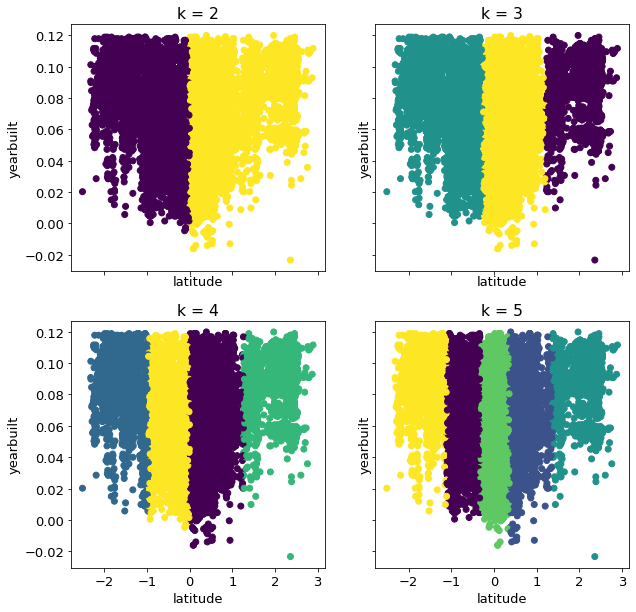

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled4).predict(X_scaled4)
    ax.scatter(X_scaled3.latitude, X_scaled4.yearbuilt, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='yearbuilt')

In [86]:
def create_scatter_plot_lat_yb(x, y, df, kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    
    plt.figure(figsize=(14, 9))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster_latitude_yearbuilt')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

In [87]:
# use the functions created above: 3 clusters

df, X_scaled4, scaler4, kmeans4, centroids4 = create_cluster(train, X4, 3, 'cluster_latitude_yearbuilt' )

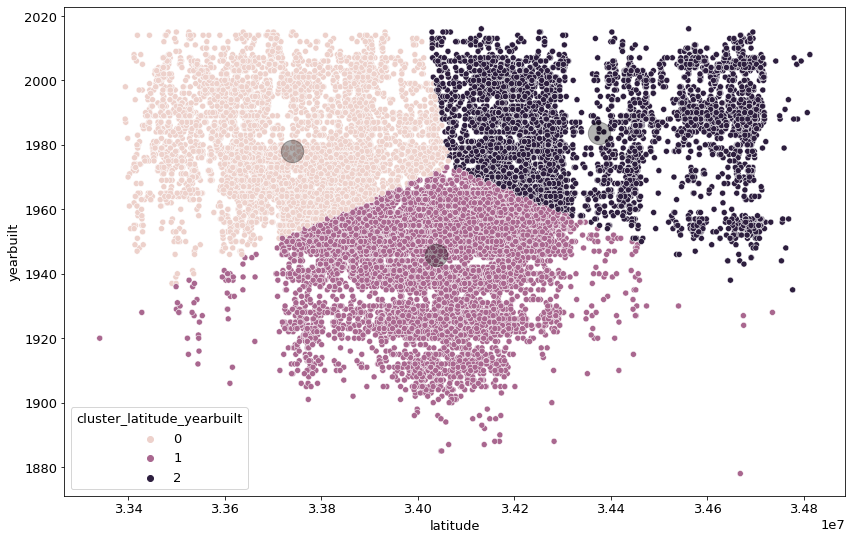

In [88]:
# use the functions created above to plot the data
create_scatter_plot_lat_yb('latitude', 'yearbuilt', train, kmeans4, X_scaled4, scaler4)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28525 entries, 42410 to 51791
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               28525 non-null  int64   
 1   parcelid                         28525 non-null  int64   
 2   bathroomcnt                      28525 non-null  float64 
 3   bedroomcnt                       28525 non-null  float64 
 4   calculatedbathnbr                28525 non-null  float64 
 5   calculatedfinishedsquarefeet     28525 non-null  float64 
 6   finishedsquarefeet12             28525 non-null  float64 
 7   fips                             28525 non-null  float64 
 8   fullbathcnt                      28525 non-null  float64 
 9   latitude                         28525 non-null  float64 
 10  longitude                        28525 non-null  float64 
 11  lotsizesquarefeet                28525 non-null  float64 
 12  

## Further Exploration after performing Clustering: Correlations and Statitistical testing

In [136]:
def get_heatmap(col_list, target,  color = 'mako'):
    '''
    This method will return a heatmap of all variables and there relation to logerror
    '''
    plt.figure(figsize=(14,12))
    heatmap = sns.heatmap(col_list.corr()[[target]].sort_values(by=target, ascending=False), annot=True, linewidth=0.5,fmt = '.0%',cmap = color, center = 0)
    heatmap.set_title('Feautures  Correlating with {}'.format(target))
    
    return heatmap

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

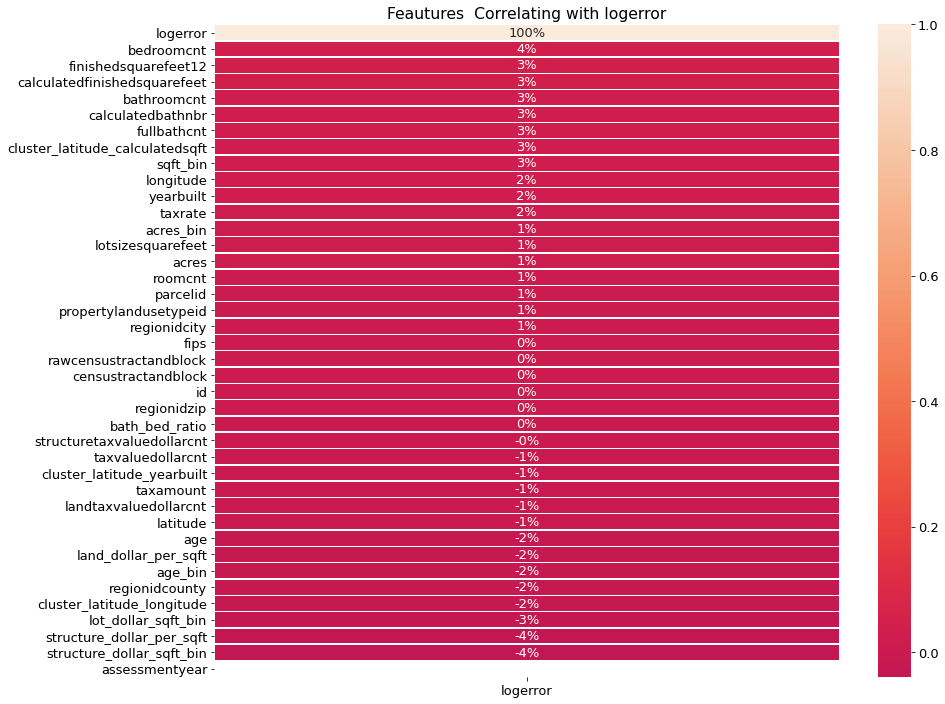

In [137]:
get_heatmap(train, 'logerror', color= 'rocket')

In [150]:
col_list_clusters_fts= train[['logerror','cluster_latitude_calculatedsqft', 'cluster_latitude_longitude', 'cluster_latitude_yearbuilt', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio' ]]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

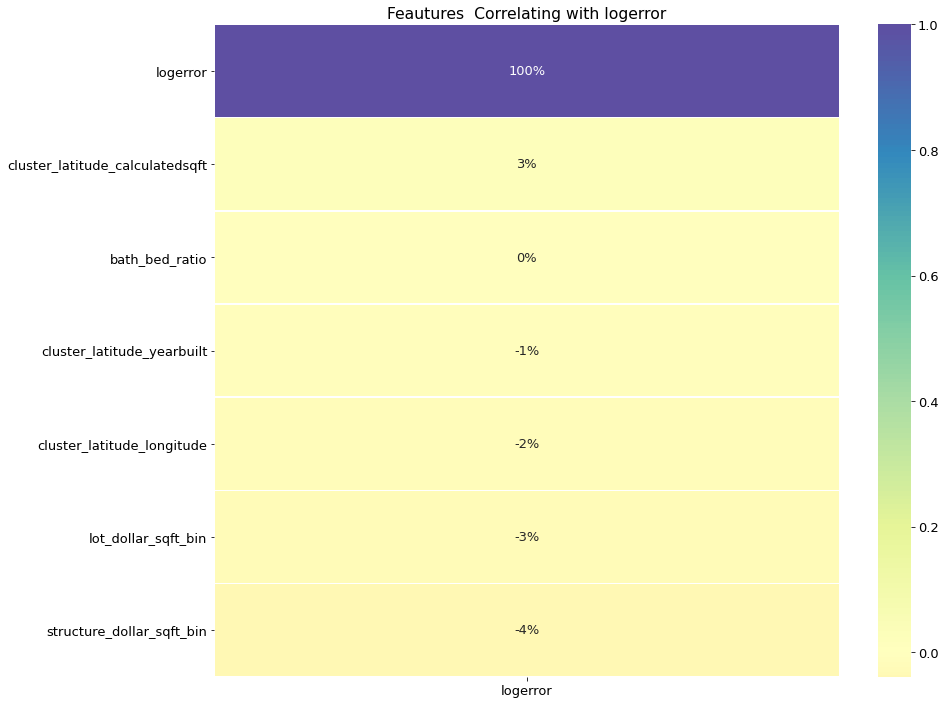

In [151]:
get_heatmap(col_list_clusters_fts, 'logerror', color= 'Spectral' )

## Statistics

In [162]:
# Is there a relationship between latitude and calculated square feet?
# continous vs cotinuous
# pearson correlation r

In [163]:
corr, p= stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
print(corr,p)

0.0341671582032706 7.831670673319782e-09


In [164]:
alpha= 0.05

null = 'There is no relationship between latitude and calculated square feet'

if p < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypothesis,  There is no relationship between latitude and calculated square feet


## Takeways After Exploration with Clusters:
- logerror has low correlation rates to features in general
    - highest correlated features include:
        - 4%: Bedroom count
        - 3%: Finished square feet 12 (finished living area), calculated Finished Square Feet (calculated total finish living area of home), bathroom count, calculatedbathnbr (# of bathrooms in home including fractional bathroom), Full bath count, <font color=yellow>cluster_latitude_calculatedsquarefeet</font>, square feet bin
        - 2%: Longitude (West to East), yearbuilt, tax rate
        
- Performed several clusters but only find value in the cluster with latitude and calculated square feet.
    - correlation not very high but has value compared to other features
        

if time: 
- create pairplot

# Modeling

In [ ]:
## OLS Linear Regression Model

## Modeling Takeaways: